In [1]:
!pip install numpy pandas scikit-learn tensorflow matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Memuat data
data = pd.read_csv('AAPL.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
harga_penutupan = data['Close'].values.reshape(-1, 1)

# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_harga_penutupan = scaler.fit_transform(harga_penutupan)

# Mempersiapkan data untuk prediksi deret waktu
def create_dataset(dataset, look_back=60):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 60
X, y = create_dataset(scaled_harga_penutupan, look_back)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10468 entries, 1980-12-12 to 2022-06-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10468 non-null  float64
 1   High       10468 non-null  float64
 2   Low        10468 non-null  float64
 3   Close      10468 non-null  float64
 4   Adj Close  10468 non-null  float64
 5   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 572.5 KB


In [19]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10468.000000,10468.000000,10468.000000,10468.000000,10468.000000,1.046800e+04
mean,14.757987,14.921491,14.594484,14.763533,14.130431,3.308489e+08
std,31.914174,32.289158,31.543959,31.929489,31.637275,3.388418e+08
min,0.049665,0.049665,0.049107,0.049107,0.038329,0.000000e+00
25%,0.283482,0.289286,0.276786,0.283482,0.235462,1.237768e+08
50%,0.474107,0.482768,0.465960,0.475446,0.392373,2.181592e+08
75%,14.953303,15.057143,14.692589,14.901964,12.835269,4.105794e+08
max,182.630005,182.940002,179.119995,182.009995,181.511703,7.421641e+09


In [20]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600
...,...,...,...,...,...,...
2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100
2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300
2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU

# Membangun model RNN
def build_rnn_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(50, input_shape=input_shape, return_sequences=True))
    model.add(SimpleRNN(50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Membangun model LSTM
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, input_shape=input_shape, return_sequences=True))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Membangun model GRU
def build_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(50, input_shape=input_shape, return_sequences=True))
    model.add(GRU(50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

input_shape = (X_train.shape[1], X_train.shape[2])
rnn_model = build_rnn_model(input_shape)
lstm_model = build_lstm_model(input_shape)
gru_model = build_gru_model(input_shape)


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
# Melatih model
rnn_history = rnn_model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test), verbose=2)
lstm_history = lstm_model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test), verbose=2)
gru_history = gru_model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test), verbose=2)

# Mengevaluasi model
rnn_loss = rnn_model.evaluate(X_test, y_test)
lstm_loss = lstm_model.evaluate(X_test, y_test)
gru_loss = gru_model.evaluate(X_test, y_test)

print(f'RNN Loss: {rnn_loss}')
print(f'LSTM Loss: {lstm_loss}')
print(f'GRU Loss: {gru_loss}')


Epoch 1/20
131/131 - 9s - 72ms/step - loss: 0.0015 - val_loss: 0.1699
Epoch 2/20
131/131 - 3s - 24ms/step - loss: 1.2020e-05 - val_loss: 0.1426
Epoch 3/20
131/131 - 3s - 23ms/step - loss: 9.5534e-06 - val_loss: 0.1244
Epoch 4/20
131/131 - 3s - 24ms/step - loss: 8.7136e-06 - val_loss: 0.1133
Epoch 5/20
131/131 - 3s - 22ms/step - loss: 6.7777e-06 - val_loss: 0.1040
Epoch 6/20
131/131 - 3s - 19ms/step - loss: 6.1483e-06 - val_loss: 0.0976
Epoch 7/20
131/131 - 3s - 20ms/step - loss: 5.6307e-06 - val_loss: 0.0874
Epoch 8/20
131/131 - 3s - 20ms/step - loss: 5.4436e-06 - val_loss: 0.0831
Epoch 9/20
131/131 - 3s - 20ms/step - loss: 4.3611e-06 - val_loss: 0.0757
Epoch 10/20
131/131 - 3s - 20ms/step - loss: 3.6258e-06 - val_loss: 0.0700
Epoch 11/20
131/131 - 3s - 20ms/step - loss: 3.4438e-06 - val_loss: 0.0627
Epoch 12/20
131/131 - 3s - 19ms/step - loss: 3.2220e-06 - val_loss: 0.0585
Epoch 13/20
131/131 - 3s - 20ms/step - loss: 2.8720e-06 - val_loss: 0.0537
Epoch 14/20
131/131 - 3s - 20ms/step -

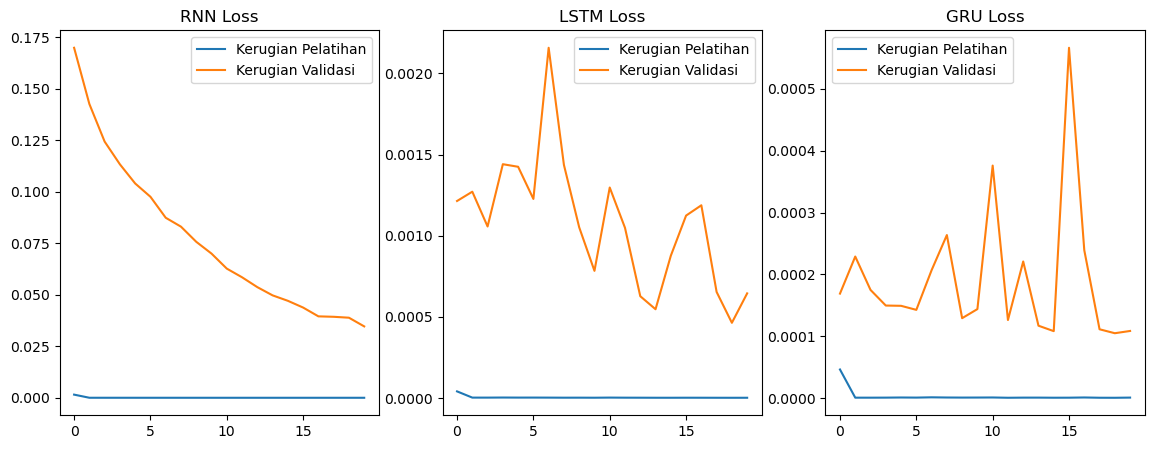

In [23]:
# Plot kerugian pelatihan dan validasi untuk setiap model
plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
plt.plot(rnn_history.history['loss'], label='Kerugian Pelatihan')
plt.plot(rnn_history.history['val_loss'], label='Kerugian Validasi')
plt.title('RNN Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(lstm_history.history['loss'], label='Kerugian Pelatihan')
plt.plot(lstm_history.history['val_loss'], label='Kerugian Validasi')
plt.title('LSTM Loss')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(gru_history.history['loss'], label='Kerugian Pelatihan')
plt.plot(gru_history.history['val_loss'], label='Kerugian Validasi')
plt.title('GRU Loss')
plt.legend()

plt.show()